### Overview
In our experiment, we intentionally injected a set of anomalies using a realistic and complex approach. For more details on our methodology, please refer to the following files:
- **Data_Generation.ipynb**
- **Data Generation Process.pdf**
- **variable_dependency_graph.gv.png** (illustrates the directed acyclic graph outlining the relationships)

The goal is to test whether ProRCA can identify the root causes of these anomalies, even with the complexity of the underlying dependency structure.

Below is the schedule of the originally injected anomalies:

```python
anomaly_schedule = {
    '2023-01-10': ('ExcessiveDiscount', 0.5, 'PricingError', 'Apparel'),
    '2023-06-10': ('COGSOverstatement', -0.8, 'SupplierIssue', 'Footwear'),
    '2023-09-10': ('FulfillmentSpike', -3, 'LogisticsIssue', 'Beauty'),
    '2023-12-10': ('ReturnSurge', 10, 'QualityIssue', 'Accessories')
}


### Complexity of the Injected Anomalies

The anomalies have been designed to mimic real-world challenges by incorporating multiple layers of complexity:

- **Multi-Dimensional Structure:** Each anomaly is defined by several attributes—a specific anomaly type, its magnitude, the associated root cause, and the relevant product category—making each event a composite of several interdependent factors.
- **Interconnected Dependencies:** The anomalies are embedded within a network of intricate relationships, as depicted in the DAG from the `variable_dependency_graph.gv.png` file. This network means that changes in one variable can cascade through others, complicating the isolation of the original source.
- **Temporal Dynamics:** Injected at different times, the anomalies introduce a time-varying aspect to the data. This not only challenges detection methods but also tests the robustness of the analytical approach over evolving conditions.
- **Realistic Simulation:** Leveraging a realistic and complicated approach (details in `Data_Generation.ipynb` and `Data Generation Process.pdf`), these anomalies reflect the complexity of operational data environments where multiple underlying factors interact simultaneously.

Together, these factors create a challenging scenario for ProRCA, testing its ability to accurately identify the root causes amid overlapping, dynamic, and interdependent anomalies.

In [ ]:
import sys
import pandas as pd
sys.path.append('../src')
from pathway import CausalRootCauseAnalyzer, ScmBuilder, CausalResultsVisualizer
from anomaly import AnomalyDetector
from graphviz import Digraph
from dag_builder import DagBuilder

In [26]:
df = pd.read_csv('fashion_data_with_anomalies_aggregated.csv', 
                 parse_dates=['ORDERDATE'])

0   2023-01-10
1   2023-06-10
2   2023-09-10
3   2023-12-10
Name: ORDERDATE, dtype: datetime64[ns]


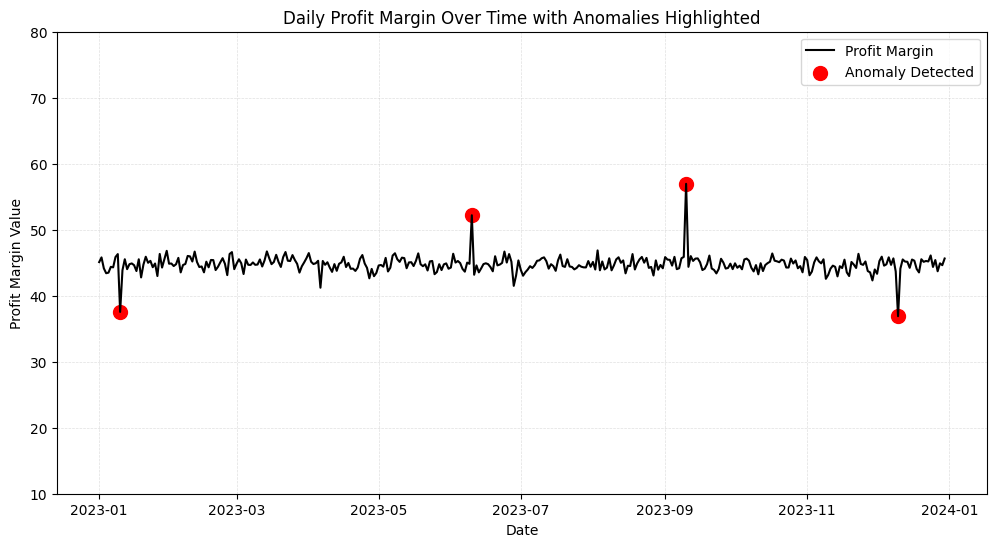

In [30]:
# Assume df_agg is your DataFrame
detector = AnomalyDetector(df, date_col="ORDERDATE", value_col="PROFIT_MARGIN")
anomalies = detector.detect()
anomaly_dates = detector.get_anomaly_dates()
print(anomaly_dates)
detector.visualize(figsize=(12,6), ylim=(10,80))

In [ ]:
# Automatically Create the DAG
edges = DagBuilder(df.columns)
# Build a Structural Causal Model
builder = ScmBuilder(edges=edges, nodes=None, visualize=False)
scm = builder.build(df=df)
# analyze Root Causes 
analyzer = CausalRootCauseAnalyzer(scm, min_score_threshold=0.7)
results_by_date = analyzer.analyze_by_date(df, anomaly_dates, start_node='PROFIT_MARGIN')

# Print the results
for ad, result in results_by_date.items():
    print(f"\nResults for anomaly date {ad}:")
    for path, score in result['paths']:
        print(f"Path with significance {score:.4f}: {path}")

Automatically assigning causal mechanisms...
Fitting the Structural Causal Model...


Fitting causal mechanism of node MARKETING_COST: 100%|██████████| 13/13 [00:00<00:00, 80.15it/s] 


--- Analyzing anomaly date: 2023-01-10 00:00:00 ---



Evaluating set functions...: 100%|██████████| 2/2 [00:00<00:00, 1417.23it/s]
c:\ProRca\prorca\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\ProRca\prorca\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\ProRca\prorca\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)



Found 3 potential root cause paths.

Detailed path analysis (ordered by causal significance):
------------------------------------------------------------

Path 1 (Causal Significance: 0.0871):
├─ PROFIT_MARGIN        (Combined Score: 0.8046, Noise Contribution: 0.0382)
  ├─ NET_SALES            (Combined Score: 0.8158, Noise Contribution: 0.0745)
    └─ DISCOUNT             (Combined Score: 0.8691, Noise Contribution: 0.1244)

Path 2 (Causal Significance: 0.0744):
├─ PROFIT_MARGIN        (Combined Score: 0.8046, Noise Contribution: 0.0382)
  ├─ PROFIT               (Combined Score: 0.8280, Noise Contribution: 0.0340)
    └─ SHIPPING_REVENUE     (Combined Score: 0.7707, Noise Contribution: 0.1063)

Path 3 (Causal Significance: 0.0574):
├─ PROFIT_MARGIN        (Combined Score: 0.8046, Noise Contribution: 0.0382)
  ├─ PROFIT               (Combined Score: 0.8280, Noise Contribution: 0.0340)
    └─ RETURN_COST          (Combined Score: 0.7636, Noise Contribution: 0.0821)

--- Analyzing a

Evaluating set functions...: 100%|██████████| 2/2 [00:00<00:00, 3005.59it/s]
c:\ProRca\prorca\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\ProRca\prorca\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\ProRca\prorca\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)



Found 2 potential root cause paths.

Detailed path analysis (ordered by causal significance):
------------------------------------------------------------

Path 1 (Causal Significance: 0.1737):
├─ PROFIT_MARGIN        (Combined Score: 0.7103, Noise Contribution: 0.0381)
  ├─ PROFIT               (Combined Score: 0.7997, Noise Contribution: 0.0387)
    ├─ COST_OF_GOODS_SOLD   (Combined Score: 0.6920, Noise Contribution: -0.0110)
      └─ UNIT_COST            (Combined Score: 0.8581, Noise Contribution: 0.2482)

Path 2 (Causal Significance: 0.0391):
├─ PROFIT_MARGIN        (Combined Score: 0.7103, Noise Contribution: 0.0381)
  ├─ PROFIT               (Combined Score: 0.7997, Noise Contribution: 0.0387)
    └─ RETURN_COST          (Combined Score: 0.7909, Noise Contribution: 0.0559)

--- Analyzing anomaly date: 2023-09-10 00:00:00 ---


Evaluating set functions...: 100%|██████████| 2/2 [00:00<00:00, 1170.29it/s]
c:\ProRca\prorca\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\ProRca\prorca\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\ProRca\prorca\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)



Found 3 potential root cause paths.

Detailed path analysis (ordered by causal significance):
------------------------------------------------------------

Path 1 (Causal Significance: 0.1750):
├─ PROFIT_MARGIN        (Combined Score: 0.8212, Noise Contribution: 0.0384)
  ├─ PROFIT               (Combined Score: 0.7461, Noise Contribution: -0.0205)
    └─ FULFILLMENT_COST     (Combined Score: 0.7995, Noise Contribution: 0.2500)

Path 2 (Causal Significance: 0.0659):
├─ PROFIT_MARGIN        (Combined Score: 0.8212, Noise Contribution: 0.0384)
  ├─ PROFIT               (Combined Score: 0.7461, Noise Contribution: -0.0205)
    └─ SHIPPING_REVENUE     (Combined Score: 0.7076, Noise Contribution: 0.0942)

Path 3 (Causal Significance: -0.0291):
├─ PROFIT_MARGIN        (Combined Score: 0.8212, Noise Contribution: 0.0384)
  └─ NET_SALES            (Combined Score: 0.7804, Noise Contribution: -0.0416)

--- Analyzing anomaly date: 2023-12-10 00:00:00 ---


Evaluating set functions...: 100%|██████████| 2/2 [00:00<00:00, 3076.13it/s]



Found 3 potential root cause paths.

Detailed path analysis (ordered by causal significance):
------------------------------------------------------------

Path 1 (Causal Significance: 0.0577):
├─ PROFIT_MARGIN        (Combined Score: 0.7689, Noise Contribution: 0.0381)
  ├─ PROFIT               (Combined Score: 0.8350, Noise Contribution: 0.0415)
    └─ RETURN_COST          (Combined Score: 0.8424, Noise Contribution: 0.0825)

Path 2 (Causal Significance: 0.0055):
├─ PROFIT_MARGIN        (Combined Score: 0.7689, Noise Contribution: 0.0381)
  └─ NET_SALES            (Combined Score: 0.7282, Noise Contribution: 0.0079)

Path 3 (Causal Significance: -0.1460):
├─ PROFIT_MARGIN        (Combined Score: 0.7689, Noise Contribution: 0.0381)
  ├─ PROFIT               (Combined Score: 0.8350, Noise Contribution: 0.0415)
    └─ FULFILLMENT_COST     (Combined Score: 0.7730, Noise Contribution: -0.2086)

Results for anomaly date 2023-01-10 00:00:00:
Path with significance 0.0871: [('PROFIT_MARGIN'

c:\ProRca\prorca\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\ProRca\prorca\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\ProRca\prorca\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


### Conclusion

ProRCA has demonstrated impressive performance by accurately identifying the primary causal paths for each anomaly date. Despite the inherent complexity of the relationships in the dataset, ProRCA was able to:

- **Automatically assign causal mechanisms** and fit the Structural Causal Model.
- **Evaluate numerous set functions** efficiently, even under challenging conditions.
- **Identify the CORRECT root cause paths** for each anomaly date, as summarized below:

- **2023-01-10:**  
  *Primary path:* `PROFIT_MARGIN` → `NET_SALES` → `DISCOUNT` (Causal Significance: 0.0871)

- **2023-06-10:**  
  *Primary path:* `PROFIT_MARGIN` → `PROFIT` → `COST_OF_GOODS_SOLD` → `UNIT_COST` (Causal Significance: 0.1737)

- **2023-09-10:**  
  *Primary path:* `PROFIT_MARGIN` → `PROFIT` → `FULFILLMENT_COST` (Causal Significance: 0.1750)

- **2023-12-10:**  
  *Primary path:* `PROFIT_MARGIN` → `PROFIT` → `RETURN_COST` (Causal Significance: 0.0577)

These results validate the effectiveness of ProRCA in pinpointing the underlying causal factors even in complex, multi-dimensional data environments. The successful extraction of the primary paths underscores the robustness of the system in handling intricate dependencies and noisy data.
